Ramprakash Devaradjane<br>CIN : 305829425

In [19]:
# Importing the required packages and libraries
%matplotlib inline
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Used for normalization
from sklearn.preprocessing import scale

# PCA decomposition
from  sklearn.decomposition  import  PCA 

# Grid search
from sklearn.model_selection import GridSearchCV

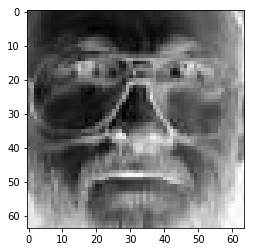

In [3]:
# Question A
# importing the fist image to check if the images are imported properly
img0 = mpimg.imread('C:/Users/rampr/Downloads/HW3/Face/0.jpg')

plt.imshow(img0,cmap=plt.cm.gray_r,interpolation='nearest')

In [4]:
# The dataset contains pixels of 400 images, hence we're excluding the zeroth image

# Creating an array to store the images
df = np.zeros((400,4096))

# Reading and storing the images
for i in range (1,400):
    img = mpimg.imread('C:/Users/rampr/Downloads/HW3/Face/'+ str(i)+'.jpg')
    reshape = img.reshape(4096)
    df[i] = np.copy(reshape)

print(df)

[[  0.   0.   0. ...   0.   0.   0.]
 [204. 198. 194. ... 120. 164. 167.]
 [ 86.  79.  82. ... 189. 185. 141.]
 ...
 [163. 177. 193. ...  44.  48.  53.]
 [145. 147. 151. ... 132. 114. 117.]
 [ 91.  74.  66. ...  75.  44.  46.]]


In [7]:
# Question B
# Creating the Feature Matrix and Label:
X = pd.DataFrame(df)

# Quesstion C
# Normalization of the feature matrix
X = scale(X,axis=0)

# Getting the labels from label.csv
label = pd.read_csv('C:/Users/rampr/Downloads/HW3/Face/label.csv')
Y = label['Label']

In [9]:
# Question D
# Splitting the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=5)

In [12]:
# Question E
k = 50 
my_pca = PCA(n_components = k) 

# X_train_new is feature matrix of training dataset after  performing the dimensionality reduction: 
X_train_new = my_pca.fit_transform(X_train) 
X_test_new = my_pca.transform(X_test) 


In [15]:
# Question F
mySVM = SVC(C=1, kernel='rbf', gamma=0.0005, random_state=1)
mySVM.fit(X_train_new, Y_train)
mySVM_prediction = mySVM.predict(X_test_new)

print(mySVM_prediction)

[16 32 39 22 29 38 21 12 23 28  9 13 29 21 10  1 36 11 39 25  8 26 19 12
 35  7 21 20 22 14  7 33 23  0 20  1 38 25  8 23 39  2 10 13 38 25 26 18
  4 36 26 17 13 16 38 36  4 36  5  6 14  9  7  7  9 22  6  6 24  0  4 31
 31 37 14 22 16 34 11 15 15  0  2 25  5 34 11 18 22 11 12  1 16 24 36 33
 32 13 38 20]


In [16]:
# Calculating the accuracy of SVM
svm_score = accuracy_score(Y_test, mySVM_prediction)
print(svm_score)

0.89


In [18]:
# Priniting the confusion matrix
cmSVM = metrics.confusion_matrix(Y_test, mySVM_prediction)
print(cmSVM)

[[3 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 1]]


In [22]:
# Question G
C_param = [0.1, 1, 10, 100, 1e3, 5e3, 1e4, 5e4, 1e5]

# creating a dictionary
param_grid = dict(C = C_param)
print(param_grid,'\n')

# Grid search model
gridValue = GridSearchCV(SVC(kernel='rbf', random_state=1), param_grid, cv=10, scoring='accuracy')

# fitting using grid
gridValue.fit(X, Y)

# Best results of grid
print(gridValue.best_score_)
print(gridValue.best_params_)

{'C': [0.1, 1, 10, 100, 1000.0, 5000.0, 10000.0, 50000.0, 100000.0]} 

0.9675
{'C': 10}
